In [21]:
import wfdb
from wfdb import processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
PATH = "apnea-ecg-database-1.0.0/"
SAMPTO = 2000

In [22]:
record_ecg = wfdb.rdrecord(PATH + "a01", sampto=SAMPTO)
annotation = wfdb.rdann(PATH+ "a01", 'qrs', sampto=SAMPTO, shift_samps=True)

df2 = record_ecg.to_dataframe()
df2['time'] = df2.index.microseconds / 1000 + df2.index.seconds * 1000
df2 = df2[['time', 'ECG']]
df2.reset_index(drop=True, inplace=True)
df2.head()

,time,ECG
0,0.0,-0.060
1,10.0,-0.065
2,20.0,-0.060
3,30.0,-0.075
4,40.0,-0.065


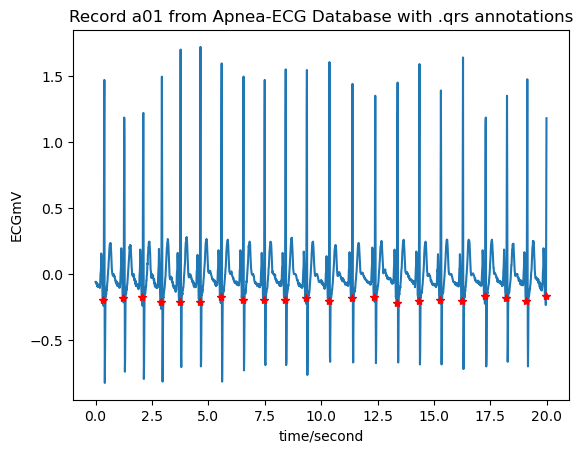

In [23]:
wfdb.plot_wfdb(record=record_ecg, annotation=annotation,
               title='Record a01 from Apnea-ECG Database with .qrs annotations',
               time_units='seconds')

[  34  123  207  290  373  461  554  652  746  839  932 1033 1135 1236
 1335 1432 1527 1625 1725 1820 1910 1995]
[ 89.  84.  83.  83.  88.  93.  98.  94.  93.  93. 101. 102. 101.  99.
  97.  95.  98. 100.  95.  90.  85.]


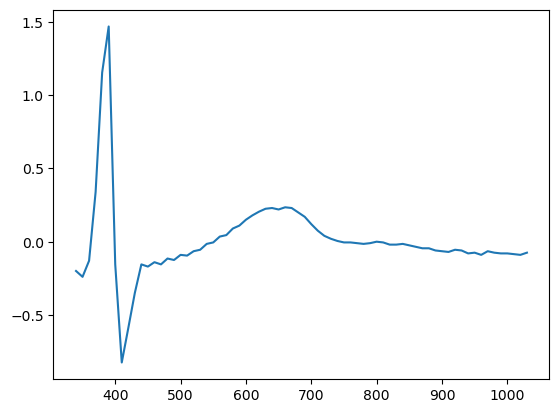

In [24]:
#przetwarzanie danych timeeeeeeee
print(annotation.sample)
num_of_beats = annotation.sample.size - 1

temp = np.zeros(num_of_beats)

for beat in range(num_of_beats):
    temp[beat] = annotation.sample[beat+1] - annotation.sample[beat]
print(temp)

#test czy to pojedyncze bicie

plt.plot(df2['time'][34:34+70], df2['ECG'][34:34+70])

In [25]:
beats = np.zeros((num_of_beats, 70))

for beat in range(num_of_beats):
    start_pos = annotation.sample[beat]
    ending_value = 70
    beats[beat] = df2['ECG'][start_pos:start_pos+ending_value]


In [26]:
#jakas zabawa
# qrs_inds = processing.qrs.gqrs_detect(sig=record_ecg.p_signal[:,0], fs=200)
# qrs_inds = (1 / record_ecg.fs) * qrs_inds
# # print(qrs_inds.size)
# # Utwórz nowy wykres i oś
# signal = record_ecg.p_signal[:, 0]
# time = (1 / record_ecg.fs) * np.arange(len(signal))

# # Utwórz nowy wykres
# fig, ax = plt.subplots()

# # Wyświetl sygnał EKG na wykresie
# ax.plot(time, signal)

# # Wygeneruj i wyrysuj dodatkowe punkty na tym samym wykresie
# ax.plot(qrs_inds, np.zeros(qrs_inds.size), 'ro')  # 'ro' oznacza czerwone kropki

# # Wyświetl wykres z dodatkowymi punktami i etykietami
# plt.show()

In [27]:
scaler = StandardScaler()
scaler.fit(beats)
X_scaled = scaler.transform(beats)

In [28]:
pca = decomposition.PCA(n_components=4)
X_transformed = pca.fit_transform(X_scaled)

In [29]:
eigen_vectors = pca.components_
eigen_values = pca.explained_variance_
print(eigen_vectors)
print(eigen_values)

[[-4.94543394e-02 -4.78112819e-02 -2.54315112e-02 -1.77279120e-02
  -1.28581416e-02  2.06964314e-02  2.07501532e-02 -8.13665761e-02
  -6.91255142e-02 -6.10905549e-02 -8.37539602e-02 -7.47997994e-02
  -7.36667493e-02 -5.28326974e-02 -1.55442015e-02 -6.50978542e-02
  -2.40164318e-02 -5.38968159e-02 -4.14659099e-02 -2.50821150e-02
  -5.34585054e-02 -3.27294977e-02  8.10410929e-05 -2.97533257e-02
  -2.90186815e-02  2.50856549e-02  1.98164948e-02 -1.60209280e-02
  -2.21045580e-02 -1.85420406e-03  2.09448290e-02 -1.36362179e-02
  -7.70900136e-02 -6.23037516e-02 -9.94285297e-02 -1.07317185e-01
  -7.72467316e-02 -1.25721958e-01 -1.16036993e-01 -1.50793929e-01
  -1.25244774e-01 -1.60848060e-01 -1.57018796e-01 -1.76793241e-01
  -1.65503806e-01 -1.65034685e-01 -1.80385823e-01 -1.64902844e-01
  -1.69983345e-01 -1.79548264e-01 -1.76247523e-01 -1.68226613e-01
  -1.64530572e-01 -1.61462090e-01 -1.72962037e-01 -1.77369202e-01
  -1.72130882e-01 -1.60465166e-01 -1.76051964e-01 -1.80722878e-01
  -1.81898

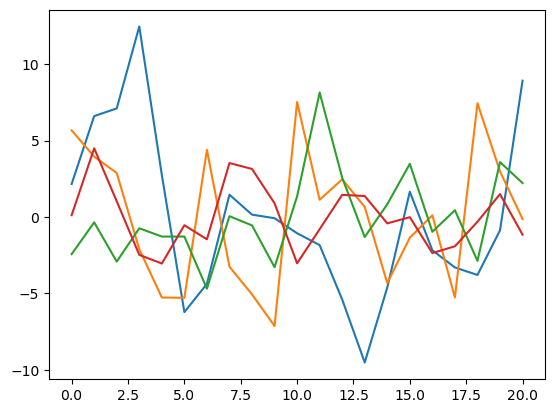

In [37]:
plt.plot(X_transformed[:,0])
plt.plot(X_transformed[:,1])
plt.plot(X_transformed[:,2])
plt.plot(X_transformed[:,3])

In [112]:
record = wfdb.rdrecord(PATH + "a01r", sampto=2000)

df = record.to_dataframe()
df['time'] = df.index.microseconds / 1000 + df.index.seconds * 1000
df = df[['time', 'Resp C', 'Resp A', 'Resp N']]
df.reset_index(drop=True, inplace=True)
df.head()

,"RESP,","PLETH,","V,","AVR,","II,",time
0 days 00:00:00,0.353862,0.435971,0.525483,0.303932,0.725477,0.0
0 days 00:00:00.008000,0.356792,0.432064,0.519606,0.335289,0.670597,8.0
0 days 00:00:00.016000,0.358745,0.428150,0.515688,0.374521,0.609809,16.0
0 days 00:00:00.024000,0.361675,0.424244,0.505893,0.419601,0.550979,24.0
0 days 00:00:00.032000,0.363643,0.421307,0.509811,0.449025,0.499986,32.0


In [ ]:
plt.plot(df2['time'], df2['ECG'])
plt.plot(df['time'], df['Resp C'])
plt.plot(df['time'], df['Resp A'])
plt.plot(df['time'], df['Resp N'])